# <font color='navygray'>INTRODUCCION A TRABAJAR CON PRECIOS HISTORICOS</font>
<font color='navygray'>Por Carlos Crespo E.</font><br>
MF-013 Análisis de Inversión<br>
Maestría de Finanzas, Facultad de Economía<br>
UANL<br>
09/oct/2019

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import plt
plt.style.use('seaborn')

In [2]:
empresas = ['ac.csv','alfaa.csv','alpeka.csv','alsea.csv',
            'amxl.csv','asurb.csv','bimboa.csv','bolsaa.csv','cemexcpo.csv',
            'elektra.csv','femsaubd.csv','gapb.csv','gcarsoa1.csv',
            'gmexicob.csv','grumab.csv','ienova.csv','kimbera.csv',
            'kofubl.csv','labb.csv','livepolc1.csv','megacpo.csv','omab.csv',
            'orbia.csv','penoles.csv','pinfra.csv','tlevisacpo.csv',
            'walmex.csv']

In [3]:
for emisora in empresas:
    nombre, terminacion = emisora.split('.')
    print(nombre)

ac
alfaa
alpeka
alsea
amxl
asurb
bimboa
bolsaa
cemexcpo
elektra
femsaubd
gapb
gcarsoa1
gmexicob
grumab
ienova
kimbera
kofubl
labb
livepolc1
megacpo
omab
orbia
penoles
pinfra
tlevisacpo
walmex


In [4]:
fecha_inicial = '2014-1-1'
fecha_final = '2019-10-4'

rango_fechas = pd.date_range(fecha_inicial, fecha_final)
rango_fechas

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', length=2103, freq='D')

In [5]:
precios_cierre = pd.DataFrame(index = rango_fechas)

In [7]:
precios_cierre.head()

""
2014-01-01
2014-01-02
2014-01-03
2014-01-04
2014-01-05


In [9]:
for empresa in empresas:
    
    nombre, terminacion = empresa.split('.')
    url = 'http://bit.ly/oncedos-{}'.format(nombre)
    
    df = pd.read_csv(url, skiprows=6, index_col=0, parse_dates = True,
                dayfirst = True, usecols = ['Date', 'PX_LAST'])
    
    df.sort_index(inplace = True)
    
    precios_cierre = precios_cierre.join(df['PX_LAST'])
    precios_cierre.rename(columns = {'PX_LAST':nombre}, inplace = True)

In [11]:
precios_cierre.head()

,ac,alfaa,alpeka,alsea,amxl,asurb,bimboa,bolsaa,cemexcpo,elektra,...,kofubl,labb,livepolc1,megacpo,omab,orbia,penoles,pinfra,tlevisacpo,walmex
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,80.15,36.46,29.53,41.04,14.13,159.87,38.96,30.35,12.916,434.17,...,155.99,36.65,149.86,44.37,43.40,52.585,328.37,157.56,78.28,33.42
2014-01-03,80.37,36.98,28.97,40.95,14.14,153.96,38.59,30.41,12.908,424.50,...,156.36,35.22,147.70,44.19,43.58,52.059,327.52,154.47,78.20,33.25
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
precios_cierre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2103 entries, 2014-01-01 to 2019-10-04
Freq: D
Data columns (total 27 columns):
ac            1448 non-null float64
alfaa         1448 non-null float64
alpeka        1448 non-null float64
alsea         1448 non-null float64
amxl          1448 non-null float64
asurb         1448 non-null float64
bimboa        1448 non-null float64
bolsaa        1448 non-null float64
cemexcpo      1448 non-null float64
elektra       1448 non-null float64
femsaubd      1448 non-null float64
gapb          1448 non-null float64
gcarsoa1      1448 non-null float64
gmexicob      1448 non-null float64
grumab        1448 non-null float64
ienova        1448 non-null float64
kimbera       1448 non-null float64
kofubl        1448 non-null float64
labb          1448 non-null float64
livepolc1     1448 non-null float64
megacpo       1448 non-null float64
omab          1448 non-null float64
orbia         1448 non-null float64
penoles       1448 non-null float64
pin

In [13]:
precios_cierre.dropna(inplace = True)

In [14]:
precios_cierre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1448 entries, 2014-01-02 to 2019-10-04
Data columns (total 27 columns):
ac            1448 non-null float64
alfaa         1448 non-null float64
alpeka        1448 non-null float64
alsea         1448 non-null float64
amxl          1448 non-null float64
asurb         1448 non-null float64
bimboa        1448 non-null float64
bolsaa        1448 non-null float64
cemexcpo      1448 non-null float64
elektra       1448 non-null float64
femsaubd      1448 non-null float64
gapb          1448 non-null float64
gcarsoa1      1448 non-null float64
gmexicob      1448 non-null float64
grumab        1448 non-null float64
ienova        1448 non-null float64
kimbera       1448 non-null float64
kofubl        1448 non-null float64
labb          1448 non-null float64
livepolc1     1448 non-null float64
megacpo       1448 non-null float64
omab          1448 non-null float64
orbia         1448 non-null float64
penoles       1448 non-null float64
pinfra     

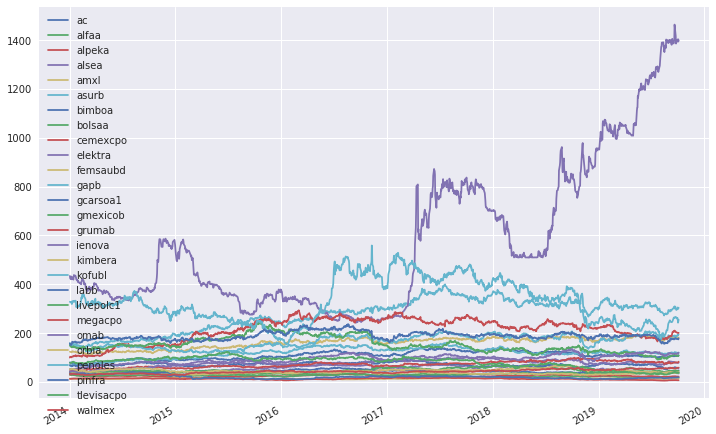

In [15]:
precios_cierre.plot(figsize = (12,8));

In [16]:
precios_normalizados = (precios_cierre / precios_cierre.iloc[0, :]) - 1

In [17]:
precios_normalizados.head()

,ac,alfaa,alpeka,alsea,amxl,asurb,bimboa,bolsaa,cemexcpo,elektra,...,kofubl,labb,livepolc1,megacpo,omab,orbia,penoles,pinfra,tlevisacpo,walmex
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,0.002745,0.014262,-0.018964,-0.002193,0.000708,-0.036968,-0.009497,0.001977,-0.000619,-0.022272,...,0.002372,-0.039018,-0.014413,-0.004057,0.004147,-0.010003,-0.002589,-0.019612,-0.001022,-0.005087
2014-01-06,-0.016344,-0.002194,-0.028446,0.016082,-0.007077,-0.075874,-0.008470,-0.015815,0.003949,-0.031163,...,-0.019488,-0.069850,-0.042306,0.025693,0.012212,-0.008348,-0.000822,-0.040429,-0.008431,-0.017056
2014-01-07,-0.014473,-0.008228,-0.017609,0.035331,-0.014154,-0.039782,-0.019764,0.005601,0.003949,-0.005344,...,0.004423,-0.059209,-0.047378,0.031778,0.008986,-0.002035,-0.004751,-0.028307,0.008687,-0.001197
2014-01-08,-0.021709,-0.013165,0.006095,0.025585,-0.029016,-0.024457,-0.049025,-0.010873,0.017885,-0.022871,...,-0.013142,-0.072578,-0.045976,0.015100,0.020046,0.020234,-0.025642,-0.013201,0.013030,-0.015859


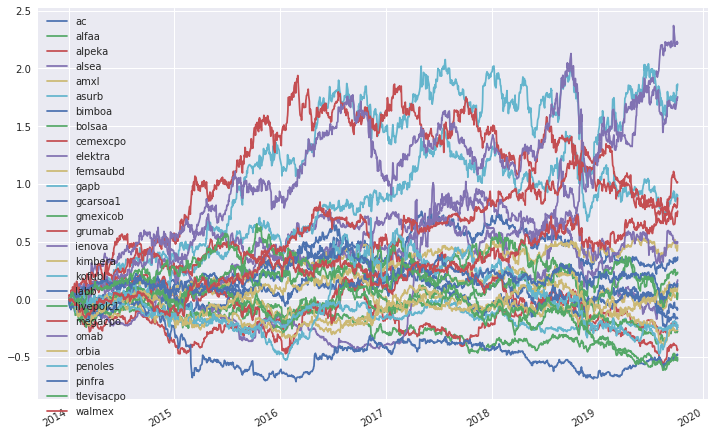

In [19]:
precios_normalizados.plot(figsize=(12,8));